# **Advertising List Generator: K-means**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import timeit
import datetime

from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

pd.set_option("display.max_columns", None)
pd.set_option('precision', 10)
import warnings
warnings.filterwarnings('ignore')

# Create Dataset 
1. collect the behavioral data of all users in one month.

2. divide the users into "key users" and "potential users", and the classification criteria is whether customers have ever entered the order payment page.

3. the data of key users is the input of K-means algorithm.

In [5]:
# df: all the data from 2021/08/16 to 2021/09/16
# user: customers ID list（including potential users and key users)
df = pd.read_csv('df.csv') 
user = pd.read_csv('user.csv') 
tag_name = pd.read_csv('tag_name.csv') 
cdp_tag_name = pd.read_csv('cdp_tag_name.csv') 

In [12]:
key_user = df[df['adtech_user_id'].isin(user[user['ID_group']=='key_user']['adtech_user_id'])]
potential_user = df[df['adtech_user_id'].isin(user[user['ID_group']=='potential_user']['adtech_user_id'])]

In [26]:
# cluster_data: input of k-means
cluster_data = copy.deepcopy(key_user)
cluster_data = shuffle(cluster_data, random_state=0) 
cluster_cookie = cluster_data["adtech_user_id"]
cluster_ground_truth = cluster_data["buy_or_not"]
need_columns = ['recency', 'visit_cnt', 'visit_day_cnt', 'stickiness_score',
       'active_score', 'purchase_cnt', 'pageview_cnt', 'IOS', 'ANDROID', 'WEB',
       'MWEB', 'source_mobile', 'source_ios', 'source_android', 'source_mweb',
       'source_web', 'own_channel_ratio', 'paid_channel_ratio',
       'earn_channel_ratio', 'TAG_1_1', 'TAG_1_2', 'TAG_1_3', 'TAG_2_1',
       'TAG_2_2', 'TAG_2_3', 'TAG_2_4', 'TAG_2_5', 'TAG_2_6', 'TAG_3_1',
       'TAG_3_2', 'TAG_3_3', 'TAG_3_4', 'TAG_3_5', 'TAG_3_6', 'TAG_3_7',
       'TAG_4_1', 'TAG_4_2', 'TAG_4_3', 'TAG_4_4', 'TAG_4_5', 'TAG_4_6',
       'TAG_4_7', 'TAG_4_8', 'TAG_5_1', 'TAG_5_2', 'TAG_5_3', 'TAG_5_4',
       'TAG_5_5', 'TAG_6_1','TAG_6_2', 'TAG_6_3', 'TAG_6_4', 'TAG_6_5', 'TAG_6_6', 'TAG_6_7',
       'TAG_6_8', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10',
       'b11', 'b12', 'b13', 'b14', 'b15', 'b16', 'b17', 'b18', 'b19', 'b20',
       'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28', 'b29', 'b30',
       'b31', 'b32', 'CDP_TAG_1_1_1', 'CDP_TAG_1_1_2', 'CDP_TAG_1_1_3',
       'CDP_TAG_1_2_1', 'CDP_TAG_1_2_2', 'CDP_TAG_1_3', 'CDP_TAG_1_4',
       'CDP_TAG_1_5_1', 'CDP_TAG_1_5_2', 'CDP_TAG_1_6', 'CDP_TAG_1_7',
       'CDP_TAG_1_8', 'CDP_TAG_2_1', 'CDP_TAG_2_2', 'CDP_TAG_3', 'CDP_TAG_4',
       'CDP_TAG_5_1', 'CDP_TAG_5_2', 'CDP_TAG_5_3', 'CDP_TAG_5_4',
       'CDP_TAG_6_1', 'CDP_TAG_6_2', 'CDP_TAG_8', 'CDP_TAG_9_1', 'CDP_TAG_9_2',
       'CDP_TAG_9_3', 'CDP_TAG_9_4', 'CDP_TAG_10', 'CDP_TAG_12_2',
       'CDP_TAG_12_3', 'CDP_TAG_12_4', 'CDP_TAG_12_5', 'CDP_TAG_13_1',
       'CDP_TAG_13_2', 'CDP_TAG_1_percent', 'CDP_TAG_2_percent',
       'CDP_TAG_3_percent', 'CDP_TAG_4_percent', 'CDP_TAG_5_percent',
       'CDP_TAG_6_percent', 'CDP_TAG_8_percent', 'CDP_TAG_9_percent',
       'CDP_TAG_10_percent', 'CDP_TAG_12_percent', 'CDP_TAG_13_percent']

cluster_data = cluster_data[need_columns]

# K-means Clustering
1. cluster the key users into 1 to 9 clusters.

2. use the elbow method to decide the number of clusters.

3. use the average values of each column of each cluster to determine the most loyal customers in all key users. 


In [18]:
cluster = range(1,10)
# cluster_result: record the result of clustering
cluster_result = {i:[] for i in cluster}
# distortions: record the result of elbow method
distortions = {i:None for i in cluster}

In [21]:
def kmeans_model(k):
  model = KMeans(n_clusters=k, random_state=514)
  model.fit(cluster_data)
  cluster_result[k] = model.labels_
  distortions[k] = model.inertia_

In [ ]:
# start clusting
start = timeit.default_timer()
for k in cluster:
  kmeans_model(k)
print(timeit.default_timer()-start)

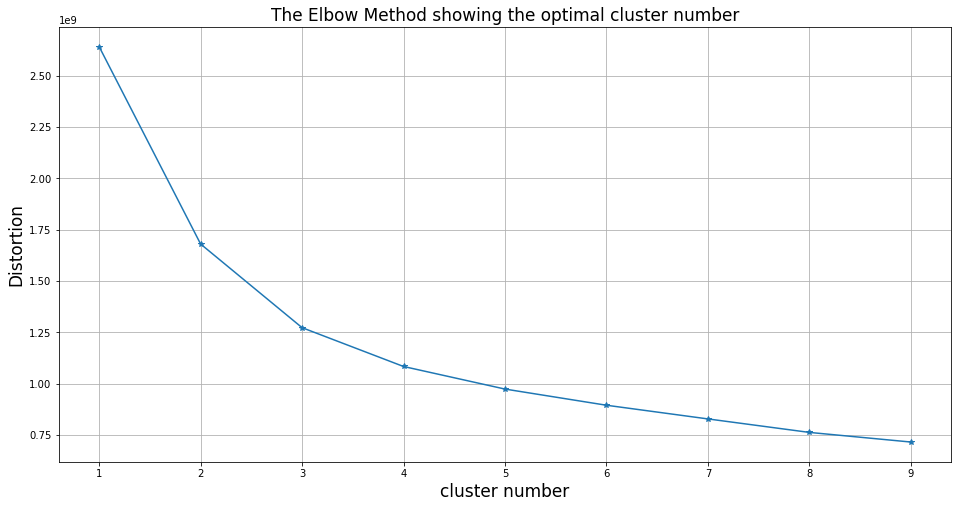

In [29]:
# elbow method to decide the number of clusters
plt.figure(figsize=(16,8))
plt.plot(cluster, distortions.values(), '*-')
plt.xlabel('cluster number', fontsize = 17)
plt.ylabel('Distortion', fontsize = 17)
plt.title('The Elbow Method showing the optimal cluster number', fontsize = 17)
plt.grid(True)
plt.show()

In [30]:
# concat the results of k-means clustering back to the "cluster_data" dataframe
cluster_num = 4
cluster_data['adtech_user_id'] = cluster_cookie
cluster_data['cluster_result'] = cluster_result[cluster_num]
cluster_data['buy_or_not'] = cluster_ground_truth

In [33]:
# translate column name which has 'TAG' or 'CDP_TAG' in it to chinese
def column_meaning(column_list):
  column_name = []  
  for i in column_list:
    if 'CDP_TAG' in i and 'percent' not in i :
      column_name.append(cdp_tag_name[cdp_tag_name['product_tag']==i[8:]]['product_tag_name'].values[0])
    elif 'CDP_TAG' in i and 'percent' in i :
      column_name.append(cdp_tag_name[cdp_tag_name['product_tag']==i[8:-8]]['product_tag_name'].values[0]+'_percent') 
    elif 'TAG' in i:
      column_name.append(tag_name[tag_name['tag_cd']==i]['tag_desc'].values[0])
    else:
      column_name.append(i)
  return column_name

In [ ]:
# mean_compare: average value of each column of each group
# choose the most loyal key users cluster we want using mean_compare
all_mean_vector = {}
tmp = cluster_data[cluster_data['cluster_result'] == 0]
cluster_mean = np.mean(np.array(tmp)[:, :-3], axis=0).reshape(1,-1)
all_mean_vector[0] = cluster_mean
count = 1
while count != cluster_num:
    tmp_1 = cluster_data[cluster_data['cluster_result'] == count]
    all_mean_vector[count] = np.mean(np.array(tmp_1)[:, :-3], axis=0).reshape(1,-1)
    cluster_mean = np.concatenate((cluster_mean, all_mean_vector[count]), axis=0)
    count += 1
mean_compare = pd.DataFrame(cluster_mean, columns=key_user.columns[1:-1])
mean_compare.set_axis(column_meaning(mean_compare.columns), axis=1)

# Produce the advertising list 
1. compute the cosine similarity score of every potential users and every cluster.

2. select the data with top 2 highest similarity scores for each potential user.

3. sort by similarity score from highest to lowest in each cluster.

4. top 20 % data of the most loyal key users cluster is the advertising list we want.

In [64]:
# all_mean_vector: record average vector of each cluster
# tmp: record the cosine similarity score of each group with each potential user
tmp = np.zeros([potential_user.shape[0], cluster_num])
for i in range(cluster_num):
  tmp[:,i] = cosine_similarity(potential_user.iloc[:, 1:-1].to_numpy(), all_mean_vector[i]).reshape(potential_user.shape[0])

In [65]:
cluster_top_want_num = 2
clustering_result = np.concatenate(((-tmp).argsort()[:,:cluster_top_want_num].reshape(-1,1), np.array(cluster_data['cluster_result']).reshape(-1,1)), axis=0)
adtech_user = np.concatenate((np.array(list(potential_user['adtech_user_id'])*cluster_top_want_num).reshape(cluster_top_want_num,-1).T.reshape(-1,1),np.array(cluster_data['adtech_user_id']).reshape(-1,1)), axis=0)
id_group = np.concatenate((np.array(list(['potential_user']*potential_user.shape[0]*cluster_top_want_num)).reshape(-1,1), np.array(list(['key_user']*cluster_data.shape[0])).reshape(-1,1)), axis=0)
similarity_score = np.concatenate(((-np.sort(-tmp)[:,:cluster_top_want_num]).reshape(-1,1), np.array([1]*cluster_data.shape[0]).reshape(-1,1)), axis=0)
adtech_user_segmentation_list = pd.DataFrame(np.concatenate((adtech_user, id_group, clustering_result, similarity_score),axis=1),
                                             columns=['adtech_user_id', 'ID_group', 'clustering_result', 'similarity_score'])

In [67]:
# sort by column "similarity_score", and then created a new column named rank
adtech_user_segmentation_list['rank'] = adtech_user_segmentation_list.groupby("clustering_result")["similarity_score"].rank('min', ascending=False)

In [69]:
# top20_percent is the advertising list
cluster_want_data = adtech_user_segmentation_list[adtech_user_segmentation_list['clustering_result'] == 2] 
top20_percent = cluster_want_data[cluster_want_data['rank'] <= cluster_want_data.shape[0]*0.2]